### Importing drive and libraries

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

In [3]:
train_path="/content/drive/MyDrive/projects/Covid detection/Train"
validation_path="/content/drive/MyDrive/projects/Covid detection/Validation"

### Preprocessing data

#### Preprocessing the training set

In [4]:
train_datagen= image.ImageDataGenerator(
    rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2,
)

train_set=train_datagen.flow_from_directory(train_path,target_size=(256,256)
,batch_size=16,class_mode="binary")

Found 248 images belonging to 2 classes.


In [5]:
train_set.class_indices

{'covid': 0, 'normal': 1}

#### Preprocessing the validation set

In [6]:
validation_datagen=image.ImageDataGenerator(
    rescale=1/255,horizontal_flip=True,zoom_range=0.2,shear_range=0.2

)

validation_set=validation_datagen.flow_from_directory(validation_path,target_size=(256,256)
,batch_size=16,class_mode="binary")

Found 81 images belonging to 2 classes.


#### Visualization of covid and normal images

printing these three images
NORMAL2-IM-0588-0001.jpeg
NORMAL2-IM-0476-0001.jpeg
NORMAL2-IM-0395-0001.jpeg


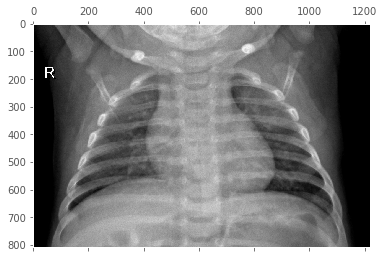

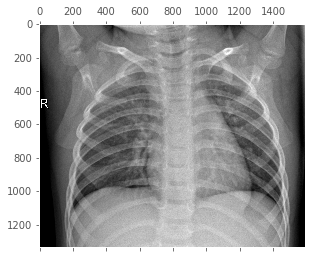

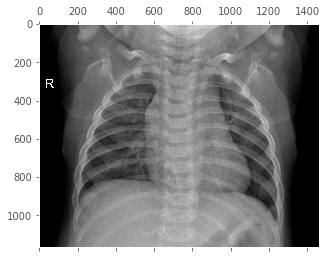

In [7]:
import os,random
folder_n="/content/drive/MyDrive/projects/Covid detection/Train/normal"
a=random.choice(os.listdir(folder_n))
b=random.choice(os.listdir(folder_n))
c=random.choice(os.listdir(folder_n))
print("printing these three images")
print(a)
print(b)
print(c)

random_n=[a,b,c]
for i in range(len(random_n)):
  file=folder_n + "/" + random_n[i]
  img=image.load_img(file)
  plt.matshow(img)
  plt.grid(False)
  plt.show()

printing these three images
23E99E2E-447C-46E5-8EB2-D35D12473C39.png
16669_3_1.jpeg
82a78c13.jpg


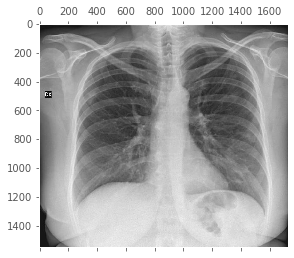

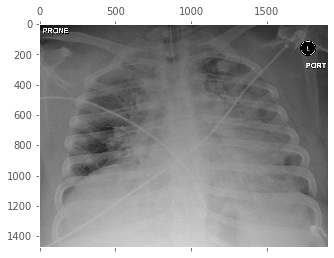

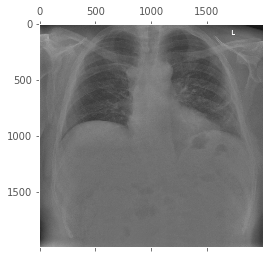

In [8]:
folder_n="/content/drive/MyDrive/projects/Covid detection/Train/covid"
a=random.choice(os.listdir(folder_n))
b=random.choice(os.listdir(folder_n))
c=random.choice(os.listdir(folder_n))
print("printing these three images")
print(a)
print(b)
print(c)

random_n=[a,b,c]

for i in range(len(random_n)):
  file=folder_n + "/" + random_n[i]
  img=image.load_img(file)
  plt.matshow(img)
  plt.grid(False)
  plt.show()

### Building the CNN

#### Intialising the layer

In [9]:
model=Sequential()

#### Add convolution layer

In [10]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

In [11]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

In [12]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

#### Flattening 

In [13]:
model.add(tf.keras.layers.Flatten())

#### Full connection

In [14]:
model.add(tf.keras.layers.Dense(units=64,activation="relu"))
model.add(tf.keras.layers.Dropout(rate=0.5))

#### Output layer

In [15]:
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

### Training the CNN

##### Compiling the CNN

In [16]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

##### Training the CNN on training set

In [18]:
history=model.fit(x=train_set,steps_per_epoch=8,epochs=25,
         validation_steps=2,validation_data=validation_set)

Epoch 1/25
8/8 [==============================] - 46s 6s/step - loss: 0.7267 - accuracy: 0.4917 - val_loss: 0.6915 - val_accuracy: 0.4375
Epoch 2/25
8/8 [==============================] - 20s 3s/step - loss: 0.6743 - accuracy: 0.5625 - val_loss: 0.6600 - val_accuracy: 0.3750
Epoch 3/25
8/8 [==============================] - 17s 2s/step - loss: 0.5500 - accuracy: 0.7969 - val_loss: 0.3833 - val_accuracy: 0.9062
Epoch 4/25
8/8 [==============================] - 10s 1s/step - loss: 0.3638 - accuracy: 0.8672 - val_loss: 0.4494 - val_accuracy: 0.8125
Epoch 5/25
8/8 [==============================] - 9s 1s/step - loss: 0.4860 - accuracy: 0.7500 - val_loss: 0.3789 - val_accuracy: 0.8125
Epoch 6/25
8/8 [==============================] - 8s 1s/step - loss: 0.4335 - accuracy: 0.8359 - val_loss: 0.3955 - val_accuracy: 0.8125
Epoch 7/25
8/8 [==============================] - 7s 1s/step - loss: 0.4082 - accuracy: 0.8250 - val_loss: 0.2804 - val_accuracy: 0.9062
Epoch 8/25
8/8 [=====================

#### Visualization of loss and accuracy 

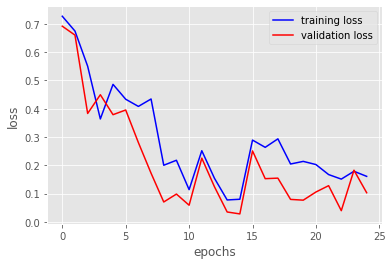

In [19]:
plt.plot(history.history["loss"],"r",label="training loss",color="blue")
plt.plot(history.history["val_loss"],label="validation loss",color="red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

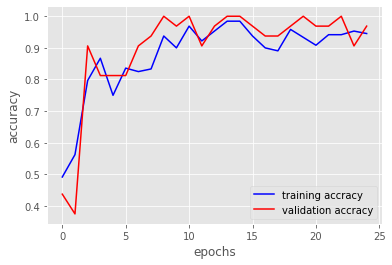

In [20]:
plt.plot(history.history["accuracy"],"r",label="training accracy",color="blue")
plt.plot(history.history["val_accuracy"],label="validation accracy",color="red")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

##### Making a single prediction

In [21]:
image_path="/content/drive/MyDrive/projects/Covid detection/Test_data/covid/f8335316.jpg"
img=image.load_img(image_path,target_size=(256,256))
img=image.img_to_array(img)/255
img=np.array([img])
print(img.shape)
model.predict(img)

(1, 256, 256, 3)


array([[0.00123423]], dtype=float32)

#### Evaluation on test data

In [22]:
covid_lst=os.listdir("/content/drive/MyDrive/projects/Covid detection/Test_data/covid")
print(covid_lst)

['FE9F9A5D-2830-46F9-851B-1FF4534959BE.jpeg', 'nejmoa2001191_f5-PA.jpeg', 'gr1_lrg-a.jpg', 'figure1-5e75d0940b71e1b702629659-98-right.jpeg', 'paving.jpg', 'lancet-case2b.jpg', 'nCoV-radiol.2020200269.fig1-day7.jpeg', 'nejmc2001573_f1b.jpeg', 'nejmoa2001191_f3-PA.jpeg', 'nejmoa2001191_f1-PA.jpeg', 'figure1-5e71be566aa8714a04de3386-98-left.jpeg', 'nejmoa2001191_f4.jpeg', 'lancet-case2a.jpg', 'nejmc2001573_f1a.jpeg', 'fff49165-b22d-4bb4-b9d1-d5d62c52436c.annot.original.png', 'kjr-21-e25-g001-l-a.jpg', 'f8335316.jpg', 'gr1_lrg-b.jpg', 'ryct.2020200034.fig2.jpeg', 'radiol.2020200274.fig3d.png', 'ryct.2020003.fig2-b.png', 'radiol.2020200490.fig3.jpeg', 'ryct.2020003.fig2-c.png', 'yxppt-2020-02-19_00-51-27_287214-day8.jpg', 'thnov10p5641g006-c.png', 'ryct.2020200034.fig5-day0.jpeg', 'tpmd200203f2-c.png', 'tpmd200203f2-b.png', 'ryct.2020200034.fig5-day7.jpeg', 'ryct.2020200028.fig1a.jpeg', 'ryct.2020003.fig2-a.png']


In [23]:
covid_pred=[]
for item in covid_lst:
  img_path="/content/drive/MyDrive/projects/Covid detection/Test_data/covid/" + item
  img=image.load_img(img_path,target_size=(256,256))
  img=image.img_to_array(img)/255
  img=np.array([img])
  covid_pred.append(model.predict(img))

In [24]:
covid_class=pd.Series(covid_pred)

In [25]:
covid_class=pd.Series([covid_class[i][0] for i in range(len(covid_class))])
covid_class=covid_class.str[0]
covid_class.head()

0    0.000708
1    0.019021
2    0.714009
3    0.007764
4    0.090980
dtype: float64

In [26]:
normal_lst=os.listdir("/content/drive/MyDrive/projects/Covid detection/Test_data/normal")
print(normal_lst)

['NORMAL2-IM-1111-0001.jpeg', 'NORMAL2-IM-1131-0001.jpeg', 'NORMAL2-IM-1125-0001.jpeg', 'NORMAL2-IM-1108-0001.jpeg', 'NORMAL2-IM-1123-0001.jpeg', 'NORMAL2-IM-1120-0001.jpeg', 'NORMAL2-IM-1149-0001.jpeg', 'NORMAL2-IM-1214-0001.jpeg', 'NORMAL2-IM-1194-0001.jpeg', 'NORMAL2-IM-1183-0001.jpeg', 'NORMAL2-IM-1204-0001.jpeg', 'NORMAL2-IM-1201-0001.jpeg', 'NORMAL2-IM-1254-0001.jpeg', 'NORMAL2-IM-1256-0001.jpeg', 'NORMAL2-IM-1234-0001.jpeg', 'NORMAL2-IM-1232-0001.jpeg', 'NORMAL2-IM-1227-0001.jpeg', 'NORMAL2-IM-1243-0001.jpeg', 'NORMAL2-IM-1257-0001.jpeg', 'NORMAL2-IM-1237-0001.jpeg', 'NORMAL2-IM-1260-0001.jpeg', 'NORMAL2-IM-1253-0001.jpeg', 'NORMAL2-IM-1286-0001.jpeg', 'NORMAL2-IM-1291-0001.jpeg', 'NORMAL2-IM-1289-0001.jpeg', 'NORMAL2-IM-1266-0001-0002.jpeg', 'NORMAL2-IM-1295-0001.jpeg', 'NORMAL2-IM-1302-0001.jpeg', 'NORMAL2-IM-1308-0001.jpeg', 'NORMAL2-IM-1341-0001.jpeg', 'NORMAL2-IM-1345-0001.jpeg']


In [27]:
normal_pred=[]
for item in normal_lst:
  img_path="/content/drive/MyDrive/projects/Covid detection/Test_data/normal/" + item
  img=image.load_img(img_path,target_size=(256,256))
  img=image.img_to_array(img)/255
  img=np.array([img])
  normal_pred.append(model.predict(img))

In [28]:
normal_class=pd.Series(normal_pred)

In [29]:
normal_class=pd.Series([normal_class[i][0] for i in range(len(normal_class))])
normal_class=normal_class.str[0]
normal_class.head()

0    0.986715
1    0.998361
2    0.993867
3    0.995064
4    0.996452
dtype: float64

In [30]:
model_test_pred=pd.concat([covid_class,normal_class],axis=0)
model_test_pred=round(model_test_pred)
model_test_pred.unique()

array([0., 1.])

In [31]:
actual_normal=pd.Series([1 for i in range(len(normal_class))])
actual_covid=pd.Series([0 for i in range(len(covid_class))])

In [32]:
actual_test_data=pd.concat([actual_covid,actual_normal],axis=0)
actual_test_data.unique()

array([0, 1])

In [33]:
prediction=pd.concat([model_test_pred,actual_test_data],axis=1)
prediction.columns=["Predicted","Actual"]
prediction=prediction.sample(frac=1,random_state=100)
prediction.head()

,Predicted,Actual
11,0.0,0
28,0.0,0
22,1.0,1
18,0.0,0
15,1.0,1


##### Accuracy score,Confusion matrix and Classification report 

In [34]:
accuracy_score(actual_test_data,model_test_pred)

0.9516129032258065

In [35]:
cf=confusion_matrix(actual_test_data,model_test_pred)

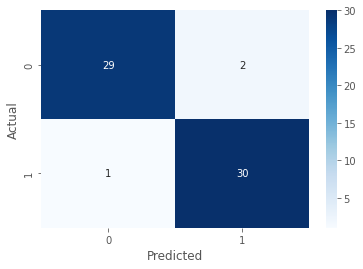

In [38]:
sns.heatmap(cf,annot=True,cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [37]:
print(classification_report(actual_test_data,model_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.94      0.97      0.95        31

    accuracy                           0.95        62
   macro avg       0.95      0.95      0.95        62
weighted avg       0.95      0.95      0.95        62

